If you pay the same effort as previous work,
 Your 1 Simulation will be----, and the final score will be: 87.04(B+) detials: HW: 86.03215024132122, Quiz: 89.82781776142477, Exam: 87.52068670689158, 
 Your 2 Simulation will be----, and the final score will be: 86.90(B) detials: HW: 85.29749922621303, Quiz: N/A, Exam: N/A, 
 Your 3 Simulation will be----, and the final score will be: 86.70(B) detials: HW: N/A, Quiz: N/A, Exam: N/A, 
 Your 4 Simulation will be----, and the final score will be: 87.05(B+) detials: HW: N/A, Quiz: N/A, Exam: N/A, 
 Your 5 Simulation will be----, and the final score will be: 87.09(B+) detials: HW: N/A, Quiz: N/A, Exam: N/A, 

If you worker than before,
 Your 1 Simulation will be----, and the final score will be: 87.04(B+) detials: HW: 88.1676929178345, Quiz: 90.93551082719246, Exam: 85.81170512021218, 
 Your 2 Simulation will be----, and the final score will be: 87.20(B+) detials: HW: 88.7321735630006, Quiz: N/A, Exam: N/A, 
 Your 3 Simulation will be----, and

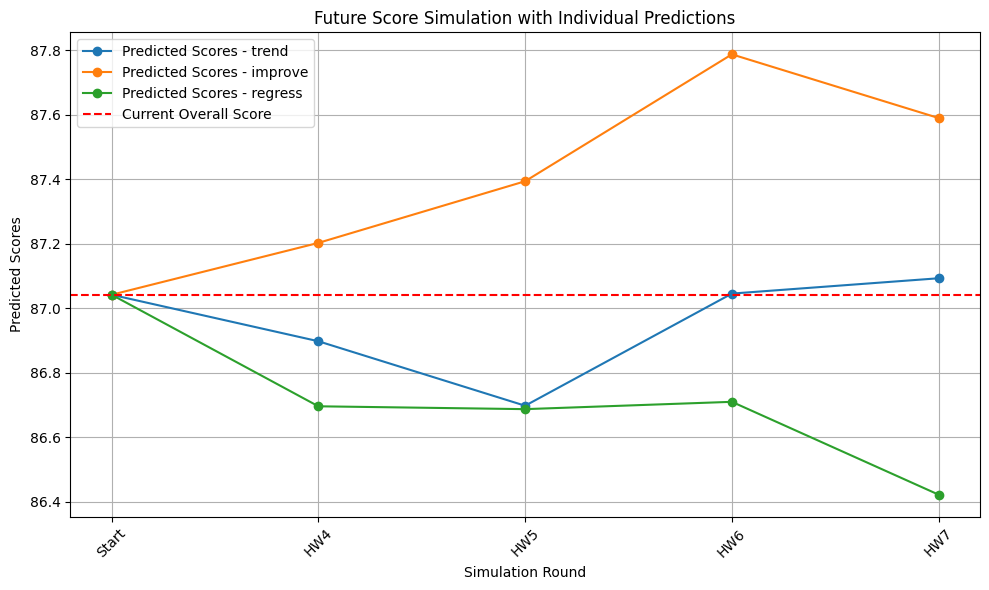

In [50]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample Data
data = {
    'student_id': [1],  # Only one student
    'HW_scores': [[86, 87, 85]],  # Homework scores
    'Quiz_scores': [[87, 90]],     # Quiz scores
    'Exam_scores': [[]],      # Empty exam scores for testing
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Helper function: calculate averages with fallback
def calculate_avg_with_fallback(hw_scores, quiz_scores, exam_scores):
    hw_avg = np.mean(hw_scores) if len(hw_scores) > 0 else None
    quiz_avg = np.mean(quiz_scores) if len(quiz_scores) > 0 else None
    exam_avg = np.mean(exam_scores) if len(exam_scores) > 0 else None

    # If any category is missing, take the average of the other non-empty ones
    if hw_avg is None:
        hw_avg = np.mean([avg for avg in [quiz_avg, exam_avg] if avg is not None])
        hw_scores.append(np.mean([avg for avg in [quiz_avg, exam_avg] if avg is not None]))
    if quiz_avg is None:
        quiz_avg = np.mean([avg for avg in [hw_avg, exam_avg] if avg is not None])
        quiz_scores.append(np.mean([avg for avg in [hw_avg, exam_avg] if avg is not None]))
    if exam_avg is None:
        exam_avg = np.mean([avg for avg in [hw_avg, quiz_avg] if avg is not None])
        exam_scores.append(np.mean([avg for avg in [hw_avg, quiz_avg] if avg is not None]))

    return hw_avg, quiz_avg, exam_avg

# Weighted average function
def weighted_average(hw_avg, quiz_avg, exam_avg, hw_count, quiz_count, exam_count):
    total_count = hw_count + quiz_count + exam_count
    weights = {
        'HW': hw_count / total_count if total_count > 0 else 0,
        'Quiz': quiz_count / total_count if total_count > 0 else 0,
        'Exams': exam_count / total_count if total_count > 0 else 0
    }
    return (hw_avg * weights['HW'] +
            quiz_avg * weights['Quiz'] +
            exam_avg * weights['Exams'])

# Grade evaluation function
def evaluate_grade(score):
    if score >= 97:
        return 'A+'
    elif score >= 93:
        return 'A'
    elif score >= 90:
        return 'A-'
    elif score >= 87:
        return 'B+'
    elif score >= 83:
        return 'B'
    elif score >= 80:
        return 'B-'
    elif score >= 77:
        return 'C+'
    elif score >= 73:
        return 'C'
    elif score >= 70:
        return 'C-'
    elif score >= 67:
        return 'D+'
    elif score >= 63:
        return 'D'
    elif score >= 60:
        return 'D-'
    else:
        return 'F'

# Simulate future scores function
def simulate_future_scores(current_final_score, hw_scores, quiz_scores, exam_scores, hw_count, quiz_count, exam_count, mode):
    future_scores = [current_final_score]  # Start with the current score
    future_hw_scores = []
    future_quiz_scores = []
    future_exam_scores = []

    # Ensure copies to avoid modifying original lists
    hw_scores = hw_scores.copy()
    quiz_scores = quiz_scores.copy()
    exam_scores = exam_scores.copy()

    # Get current counts
    current_hw_count = len(hw_scores)
    current_quiz_count = len(quiz_scores)
    current_exam_count = len(exam_scores)

    # Calculate current averages
    hw_avg = np.mean(hw_scores) if current_hw_count > 0 else 0
    quiz_avg = np.mean(quiz_scores) if current_quiz_count > 0 else 0
    exam_avg = np.mean(exam_scores) if current_exam_count > 0 else 0

    # Simulate future homework scores
    for _ in range(hw_count - current_hw_count):
        if mode == 'trend':
            predicted_hw_score = np.clip(np.random.normal(loc=hw_avg, scale=1), 0, 100)
        elif mode == 'improve':
            predicted_hw_score = np.clip(np.random.normal(loc=hw_avg + 1, scale=2), 0, 100)
        elif mode == 'regress':
            predicted_hw_score = np.clip(np.random.normal(loc=hw_avg - 1, scale=2), 0, 100)

        # Append new scores and recalculate averages
        hw_scores.append(predicted_hw_score)
        current_hw_count += 1
        hw_avg = np.mean(hw_scores)

        final_score = weighted_average(
            hw_avg,
            quiz_avg,
            exam_avg,
            current_hw_count,
            current_quiz_count,
            current_exam_count
        )
        future_scores.append(final_score)
        future_hw_scores.append(predicted_hw_score)

    # Simulate future quiz scores
    for _ in range(quiz_count - current_quiz_count):
        if mode == 'trend':
            predicted_quiz_score = np.clip(np.random.normal(loc=quiz_avg, scale=1), 0, 100)
        elif mode == 'improve':
            predicted_quiz_score = np.clip(np.random.normal(loc=quiz_avg + 1, scale=2), 0, 100)
        elif mode == 'regress':
            predicted_quiz_score = np.clip(np.random.normal(loc=quiz_avg - 1, scale=2), 0, 100)

        # Append new scores and recalculate averages
        quiz_scores.append(predicted_quiz_score)
        current_quiz_count += 1
        quiz_avg = np.mean(quiz_scores)

        final_score = weighted_average(
            hw_avg,
            quiz_avg,
            exam_avg,
            current_hw_count,
            current_quiz_count,
            current_exam_count
        )
        future_scores.append(final_score)
        future_quiz_scores.append(predicted_quiz_score)

    # Simulate future exam scores
    for _ in range(exam_count - current_exam_count):
        if mode == 'trend':
            predicted_exam_score = np.clip(np.random.normal(loc=exam_avg, scale=1), 0, 100)
        elif mode == 'improve':
            predicted_exam_score = np.clip(np.random.normal(loc=exam_avg + 1, scale=2), 0, 100)
        elif mode == 'regress':
            predicted_exam_score = np.clip(np.random.normal(loc=exam_avg - 1, scale=2), 0, 100)

        # Append new scores and recalculate averages
        exam_scores.append(predicted_exam_score)
        current_exam_count += 1
        exam_avg = np.mean(exam_scores)

        final_score = weighted_average(
            hw_avg,
            quiz_avg,
            exam_avg,
            current_hw_count,
            current_quiz_count,
            current_exam_count
        )
        future_scores.append(final_score)
        future_exam_scores.append(predicted_exam_score)

    return future_scores, future_hw_scores, future_quiz_scores, future_exam_scores

# Main Workflow

# Extract the scores
hw_scores = list(df['HW_scores'][0])
quiz_scores = list(df['Quiz_scores'][0])
exam_scores = list(df['Exam_scores'][0])

# Calculate averages, handling empty categories
hw_avg, quiz_avg, exam_avg = calculate_avg_with_fallback(hw_scores, quiz_scores, exam_scores)

# Current final score calculation
if hw_avg is not None and quiz_avg is not None and exam_avg is not None:
    current_final_score = weighted_average(hw_avg, quiz_avg, exam_avg, len(hw_scores), len(quiz_scores), len(exam_scores))

    # Define total future assessments to simulate
    total_hw = 5
    total_quiz = 3
    total_exam = 2

    # Simulate scores for different modes
    modes = ['trend', 'improve', 'regress']
    future_scores_all_modes = {
        mode: simulate_future_scores(
            current_final_score,
            hw_scores,
            quiz_scores,
            exam_scores,
            total_hw,
            total_quiz,
            total_exam,
            mode
        ) for mode in modes
    }

    # Output results and plot the score trends
    for mode, (scores, hw_preds, quiz_preds, exam_preds) in future_scores_all_modes.items():
        if(mode == 'trend'):
            print(f"If you pay the same effort as previous work,")
        if(mode == 'regress'):
            print(f"If you become lazy,")
        if(mode == 'improve'):
            print(f"If you worker than before,")            
        for i, score in enumerate(scores):
            hw_score = hw_preds[i] if i < len(hw_preds) else "N/A"
            quiz_score = quiz_preds[i] if i < len(quiz_preds) else "N/A"
            exam_score = exam_preds[i] if i < len(exam_preds) else "N/A"
            print(f" Your {i + 1} Simulation will be----, and the final score will be: {score:.2f}({evaluate_grade(score)}) detials: HW: {hw_score}, Quiz: {quiz_score}, Exam: {exam_score}, ")
        print()

    # Create meaningful x-axis labels for future simulations
    labels = []
    for i in range(1, total_hw + 1):
        labels.append(f"HW{i+len(hw_scores)}")
    for i in range(1, total_quiz + 1):
        labels.append(f"Quiz{i+len(quiz_scores)}")
    for i in range(1, total_exam + 1):
        labels.append(f"Exam{i+len(exam_scores)}")

    # Plotting the score trends
    plt.figure(figsize=(10, 6))
    for mode, (scores, _, _, _) in future_scores_all_modes.items():
        plt.plot(scores, label=f'Predicted Scores - {mode}', marker='o')
    
    plt.axhline(y=current_final_score, color='r', linestyle='--', label='Current Overall Score')
    plt.title('Future Score Simulation with Individual Predictions')
    plt.xlabel('Simulation Round')
    plt.ylabel('Predicted Scores')

    # Set x-axis labels
    max_length = max(len(scores) for scores, _, _, _ in future_scores_all_modes.values())
    full_labels = ['Start'] + labels[:max_length-1]  # Add the "Start" for the current score point
    plt.xticks(range(max_length), full_labels, rotation=45)

    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

else:
    print("Invalid data. Cannot proceed with calculations.")
